In [3]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
import gc
import sys

#df_13 = pd.read_csv('13_clean.csv')
#df_13.head()

years = ['85', '87', '89', '91', '93', '95', '97', '99', '01', '03', '05', '07', '09', '11', '13']
years_num = [1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013 ]



def combineDataFrame(years, years_num):
    
    df_allYears = pd.DataFrame()
    
    for year, i in zip(years, years_num):
        df = pd.read_csv(year + '_clean.csv')
        df['YEAR'] = i
        df_allYears = df_allYears.append(df)
    
    return df_allYears
    
df_allYears = combineDataFrame(years, years_num)

In [4]:
df_allYears.head()

,CONTROL,AGE,BEDRMS,FMTBUILT,BURDEN,COSTMED,COSTMEDRELAMIPCT,FMTCOSTMEDRELAMICAT,FMR,FMTASSISTED,...,FMTMETRO,FMTZADEQ,ABL50,ABL80,ABLMED,GL50,GL80,GLMED,L50,YEAR
0,'100006110249',39.0,3.0,'1980-1989',0.317333,476.000000,81.283131,'4 60 - 80% AMI',380.0,'0 Not Assisted',...,'-5','1 Adequate',11957.724480,19127.189120,23424.29440,11497.812,18391.528,22523.360,12027.0,1985
1,'100007130148',40.0,2.0,'1980-1989',0.323662,383.000000,60.305059,'4 60 - 80% AMI',349.0,'0 Not Assisted',...,'Central City','1 Adequate',12700.460000,20322.648000,25404.17040,12700.460,20322.648,28226.856,13285.0,1985
2,'100014110140',19.0,2.0,'1980-1989',0.318000,371.000000,73.207945,'4 60 - 80% AMI',289.0,'0 Not Assisted',...,'-5','1 Adequate',10346.310000,16550.869500,20271.02400,9196.720,14711.884,22523.360,9620.0,1985
3,'100014350142',28.0,3.0,'1980-1989',0.277371,1496.349020,178.071751,'7 120% AMI +',596.0,'0 Not Assisted',...,'-5','1 Adequate',17066.681956,25737.559467,33612.27168,14769.244,22272.888,32319.492,15449.0,1985
4,'100015770147',30.0,3.0,'1980-1989',0.205429,726.679228,97.552691,'5 80 - 100% AMI',453.0,'0 Not Assisted',...,'-5','1 Adequate',14877.558800,23828.204400,29796.37856,11444.276,18329.388,28650.364,11971.0,1985


In [5]:
df_allYears.columns

Index(['CONTROL', 'AGE', 'BEDRMS', 'FMTBUILT', 'BURDEN', 'COSTMED',
       'COSTMEDRELAMIPCT', 'FMTCOSTMEDRELAMICAT', 'FMR', 'FMTASSISTED',
       'FMTOWNRENT', 'FMTSTATUS', 'FMTSTRUCTURETYPE', 'FMTINCRELAMICAT',
       'INCRELAMIPCT', 'IPOV', 'LMED', 'NUNITS', 'OTHERCOST', 'PER', 'ROOMS',
       'TOTSAL', 'UTILITY', 'VALUE', 'ZINC2', 'ZSMHC', 'REGION', 'FMTMETRO',
       'FMTZADEQ', 'ABL50', 'ABL80', 'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50',
       'YEAR'],
      dtype='object')

In [6]:
for year in years_num:

    #get lowest correlation per year among variables:
    #'LMED', 'ABL50', 'ABL80', 'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50'
    
    min_corr = df_allYears.loc[df_allYears['YEAR'] == year,\
                               ['LMED', 'ABL50', 'ABL80', 'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50']].\
    corr().values.min()
    
    print(year)
    print(min_corr)
    print('\n')

1985
0.5903230944977823


1987
0.6030784771293793


1989
0.5845883023591302


1991
0.5915509553157386


1993
0.5574508153361528


1995
0.5993140731825368


1997
0.6124557520387327


1999
0.6006075503654141


2001
0.6142874077838272


2003
0.6587037323501564


2005
0.6468420454973633


2007
0.5922577243869205


2009
0.6107139277028468


2011
0.6282490524697489


2013
0.5662818042737474




In [7]:
#Keep only LMED from above set since 'ABL50', 'ABL80', 'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50' are correlated
cols = ['ABL50', 'ABL80', 'ABLMED', 'GL50', 'GL80', 'GLMED', 'L50']
df_allYears.drop(cols, axis=1, inplace=True)

In [8]:
for year in years_num:
    
    #get lowest correlation per year among variables INCRELAMIPCT, ZINC2, TOTSAL
    min_corr = df_allYears.loc[df_allYears['YEAR'] == year, ['INCRELAMIPCT', 'ZINC2', 'TOTSAL']].\
    corr().values.min()

    print(year)
    print(min_corr)
    print('\n')


1985
0.785194333665615


1987
0.7846082419107127


1989
0.795929483048063


1991
0.794587907435037


1993
0.7961255491672509


1995
0.7944408660107396


1997
0.8100958483973884


1999
0.7878848912356777


2001
0.7058713481199302


2003
0.4091824200917051


2005
0.7593526319001335


2007
0.7920494683674207


2009
0.7729517838439218


2011
0.7531528639605473


2013
0.7606053010616535




In [9]:
#Keep only 'INCRELAMIPCT' from above set since 'ZINC2', 'TOTSAL' are correlated
cols = ['ZINC2', 'TOTSAL']
df_allYears.drop(cols, axis=1, inplace=True)

In [10]:
#choose columns that are independent: 
#example, COSTMED, COSTMEDRELAMITPCT, FMTCOSTMEDRELAMIPCT 
#show the same data in different format; ditto for FMTINCRELAMICAT and INCRELAMIPCT;
#drop CONTROL as well
cols = ['CONTROL', 'COSTMED', 'FMTCOSTMEDRELAMICAT', 'FMTINCRELAMICAT']
df_allYears.drop(cols, axis=1, inplace=True)
print(df_allYears.shape)

(771870, 24)


In [11]:
#removing columns related to cost since these are related to target variable ZSMHC (monthly housing cost)
#this is to remove issues with data leakage
cols = ['COSTMEDRELAMIPCT', 'BURDEN', 'OTHERCOST', 'UTILITY']
df_allYears.drop(cols, axis=1, inplace=True)
print(df_allYears.shape)

(771870, 20)


In [12]:
cols = df_allYears.columns
for col in cols:
    n_rows = df_allYears.loc[df_allYears[col].isna()].shape
    if(n_rows[0] != 0):
        print(col)        
        print(n_rows)

BEDRMS
(2, 20)
FMR
(94, 20)
INCRELAMIPCT
(89, 20)
LMED
(91, 20)
VALUE
(272317, 20)
ZSMHC
(12678, 20)


In [13]:
df_allYears.dropna(inplace=True)
print(df_allYears.shape)

(486785, 20)


In [14]:
cols = ['FMTBUILT', 'FMTASSISTED', 'FMTOWNRENT', 'FMTSTRUCTURETYPE', 'FMTSTATUS', 'REGION', 'FMTMETRO']
for col in cols:
    print(df_allYears[col].value_counts())
    print('\n')

'not_defined'    178698
'1960-1979'      122644
'1940-1959'       76718
'1980-1989'       45627
'1990-1999'       33965
'2000-2009'       28062
'After 2010'       1071
Name: FMTBUILT, dtype: int64


'.'                 323080
'0 Not Assisted'    163705
Name: FMTASSISTED, dtype: int64


'1 Owner'    486785
Name: FMTOWNRENT, dtype: int64


'1 Single Family'    432024
'6 Mobile Home'       29210
'2 2-4 units'         12193
'3 5-19 units'         6357
'5 50+ units'          4394
'4 20-49 units'        2607
Name: FMTSTRUCTURETYPE, dtype: int64


'-5'            323080
'1 Occupied'    163705
Name: FMTSTATUS, dtype: int64


3.0    165283
2.0    129977
4.0     99539
1.0     91986
Name: REGION, dtype: int64


'-5'              371911
'Central City'    114031
'9'                  843
Name: FMTMETRO, dtype: int64




In [15]:
#remove values of FMTMETRO set to 9;
df_allYears = df_allYears.loc[~df_allYears['FMTMETRO'].str.contains('9', regex=False)]

In [16]:
#drop FMTSTATUS - earlier generated ill-defined matrix warning for ridge regression;
#values for this column is constant for several years
df_allYears.drop('FMTSTATUS', axis=1, inplace=True)

#converting REGION from int type to string type
df_allYears['REGION'] = df_allYears['REGION'].apply(str)

#convert categorical variables to indicator variables
df_allYears = pd.get_dummies(df_allYears, drop_first=True)

print(df_allYears.columns)

Index(['AGE', 'BEDRMS', 'FMR', 'INCRELAMIPCT', 'IPOV', 'LMED', 'NUNITS', 'PER',
       'ROOMS', 'VALUE', 'ZSMHC', 'YEAR', 'FMTBUILT_'1960-1979'',
       'FMTBUILT_'1980-1989'', 'FMTBUILT_'1990-1999'', 'FMTBUILT_'2000-2009'',
       'FMTBUILT_'After 2010'', 'FMTBUILT_'not_defined'',
       'FMTASSISTED_'0 Not Assisted'', 'FMTSTRUCTURETYPE_'2 2-4 units'',
       'FMTSTRUCTURETYPE_'3 5-19 units'', 'FMTSTRUCTURETYPE_'4 20-49 units'',
       'FMTSTRUCTURETYPE_'5 50+ units'', 'FMTSTRUCTURETYPE_'6 Mobile Home'',
       'REGION_2.0', 'REGION_3.0', 'REGION_4.0', 'FMTMETRO_'Central City'',
       'FMTZADEQ_'2 Moderately Inadequ'', 'FMTZADEQ_'3 Severely Indadequa''],
      dtype='object')


In [17]:
cols = df_allYears.drop(['ZSMHC'], axis=1).columns

X = df_allYears.drop(['ZSMHC'], axis=1).values

y = df_allYears['ZSMHC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_all = Ridge()

ridge_all_cv = GridSearchCV(ridge_all, param_grid, cv=5)

ridge_all_cv.fit(X_train, y_train)

print(ridge_all_cv.best_params_)
print(ridge_all_cv.best_score_)

{'alpha': 10}
0.5543567983604556


In [18]:
print(sys.getrefcount(df_allYears))

2


In [19]:
del df_allYears
gc.collect()

160

In [20]:
ridge_all_cv.cv_results_['mean_test_score']

array([0.55435667, 0.55435668, 0.55435669, 0.5543568 , 0.55435435])

In [21]:
#create ridge instance using best parameter alpha = 10 
ridge_all = Ridge(alpha=10)
ridge_all.fit(X_train, y_train)
score = ridge_all.score(X_test, y_test)
print(score)

0.5537786928286441


y-intercept =  27951.19907286043


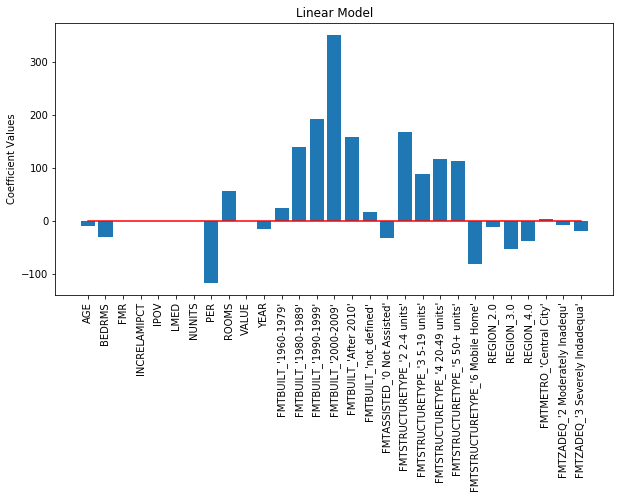

In [22]:
coeffs = ridge_all.coef_
intercept = ridge_all.intercept_
print('y-intercept = ', intercept)
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(coeffs)), coeffs)
plt.plot(np.arange(len(coeffs)), np.zeros(len(coeffs)), c='r')
plt.xticks(np.arange(len(coeffs)), cols, rotation=90)
plt.ylabel('Coefficient Values')
plt.title('Linear Model')
plt.show()

In [23]:
#create a linear model with data scaled to mean 0 and standard deviation 1
X_train_scaled = scale(X_train)
y_train_scaled = scale(y_train)

X_test_scaled = scale(X_test)
y_test_scaled = scale(y_test)

ridge_scaled = Ridge(alpha=10)
ridge_scaled.fit(X_train_scaled, y_train_scaled)
score_scaled = ridge_scaled.score(X_test_scaled, y_test_scaled)

print(score_scaled)

0.5537520385247965


y-intercept =  -2.0314330158646756e-13


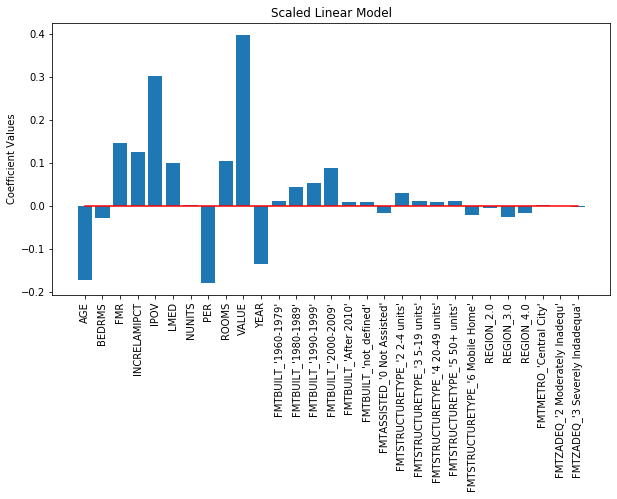

In [24]:
coeffs = ridge_scaled.coef_
intercept = ridge_scaled.intercept_
print('y-intercept = ', intercept)
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(coeffs)), coeffs)
plt.plot(np.arange(len(coeffs)), np.zeros(len(coeffs)), c='r')
plt.xticks(np.arange(len(coeffs)), cols, rotation=90)
plt.ylabel('Coefficient Values')
plt.title('Scaled Linear Model')
plt.show()

In [25]:
y_predicted = ridge_scaled.predict(X_test_scaled)

In [26]:
#computer percent errors for this model; save data for later plotting
cols_list = list(cols)
year = X_test[:, cols_list.index('YEAR')]
result_0 = pd.DataFrame({'YEAR': year, 'YPREDICTED': y_predicted, 'YACTUAL': y_test_scaled})
# remove rows where actual value is 0 as percent errior is not defined in this case
result_0 = result_0.loc[result_0['YACTUAL'] != 0.0]
result_0['PERCENT_ERROR'] = (result_0['YPREDICTED']/result_0['YACTUAL']-1.0)*100

In [27]:
result_0.head()

,YEAR,YPREDICTED,YACTUAL,PERCENT_ERROR
0,2003.0,0.158331,0.459899,-65.572633
1,1987.0,-0.676020,-0.632350,6.906082
2,2011.0,0.548575,-0.405110,-235.413746
3,2007.0,0.326986,1.185564,-72.419350
4,1997.0,-0.179569,-0.476927,-62.348746


In [28]:
coef_list = list(ridge_scaled.coef_)

coef_list = np.absolute(coef_list)

coef_cols_tuples = [(col, coef) for col, coef in zip(cols_list, coef_list)]

coef_cols_tuples = sorted(coef_cols_tuples, key = lambda x: x[1], reverse=True)

#print top 10 coefficients
for pair in coef_cols_tuples[0:10]:
    print(pair)

('VALUE', 0.3961594127275853)
('IPOV', 0.3010259737153538)
('PER', 0.17894080008369545)
('AGE', 0.17264157721615034)
('FMR', 0.1459493246523749)
('YEAR', 0.1348458905895474)
('INCRELAMIPCT', 0.12541849957674286)
('ROOMS', 0.10421864642961096)
('LMED', 0.09870448849851589)
("FMTBUILT_'2000-2009'", 0.08764635221861308)


In [29]:
print(sys.getrefcount(ridge_all_cv))
print(sys.getrefcount(ridge_all))
print(sys.getrefcount(ridge_scaled))

del ridge_all_cv
del ridge_all
del ridge_scaled

gc.collect()

2
2
2


11240

Listed above are the top 10 coefficients for the scaled linear model. I could try a new linear model that only includes these features. Instead I will proceed with a random forest regressor model which should capture non-linearities.

In [30]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100)
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)
score_rf = rf.score(X_test, y_test)
print('random forest score = ', score_rf)
print(sys.getrefcount(rf))

random forest score =  0.6064688444217472
2


In [31]:
from sklearn.model_selection import cross_validate

rf_cv = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100)
cv_results = cross_validate(rf_cv, X_train, y_train, cv=5)
cv_results['test_score']

array([0.61634041, 0.60285657, 0.60415528, 0.59851585, 0.60481841])

In [32]:
print(sys.getrefcount(rf))
print(sys.getrefcount(rf_cv))

2
2


In [33]:
del rf_cv
gc.collect()

778

In [34]:
importances = list(rf.feature_importances_)

feature_importances = [(col, importance) for col, importance in zip(cols_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print top 10 features
for pair in feature_importances[0:10]:
    print(pair)

('VALUE', 0.4825755139142085)
('AGE', 0.12004730598418124)
('INCRELAMIPCT', 0.08603236175694087)
('IPOV', 0.0658478319415893)
('FMR', 0.06393381316579366)
('LMED', 0.05410114747302978)
('ROOMS', 0.02707390955605807)
('YEAR', 0.023328457183842955)
('BEDRMS', 0.012161994133050073)
('PER', 0.007071631289384197)


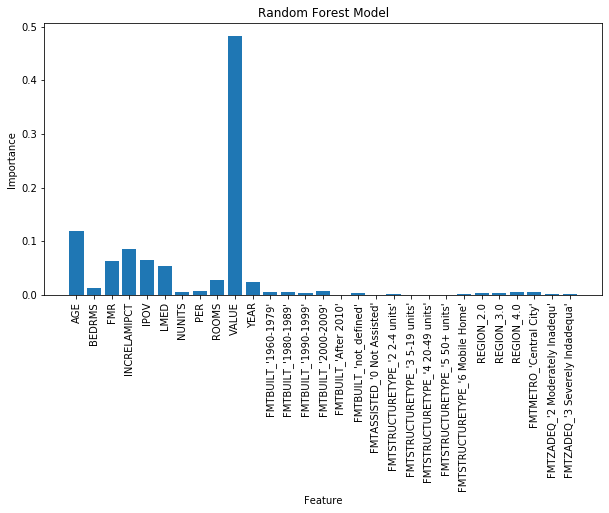

In [35]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(cols_list)), importances)
plt.xticks(np.arange(len(cols_list)), cols, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Random Forest Model')
plt.show()

In [36]:
print(sys.getrefcount(rf))

2


In [37]:
del rf
gc.collect()

5490

In [38]:
year = X_test[:, cols_list.index('YEAR')]
result = pd.DataFrame({'YEAR': year, 'YPREDICTED': y_predicted, 'YACTUAL': y_test})
# remove rows where actual value is 0 as percent errior is not defined in this case
result = result.loc[result['YACTUAL'] != 0.0]
result['PERCENT_ERROR'] = (result['YPREDICTED']/result['YACTUAL']-1.0)*100

In [39]:
years = [1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013]
yactual_avg = {}
for year in years:
    yactual_avg[year] = result.loc[result['YEAR'] == year, 'YACTUAL'].mean()

result['YPREDICTED_0'] = result['YEAR']

result.replace({'YPREDICTED_0': yactual_avg})

#this column stores the percent error for a model that predicts the average of YACTUAL,regardless of feature values
#such a model would have a score of zero
result['PERCENT_ERROR_0'] = (result['YPREDICTED_0']/result['YACTUAL'] - 1.0)*100

In [40]:
print(result_0['PERCENT_ERROR'].isna().sum())
result_0.head()

0


,YEAR,YPREDICTED,YACTUAL,PERCENT_ERROR
0,2003.0,0.158331,0.459899,-65.572633
1,1987.0,-0.676020,-0.632350,6.906082
2,2011.0,0.548575,-0.405110,-235.413746
3,2007.0,0.326986,1.185564,-72.419350
4,1997.0,-0.179569,-0.476927,-62.348746


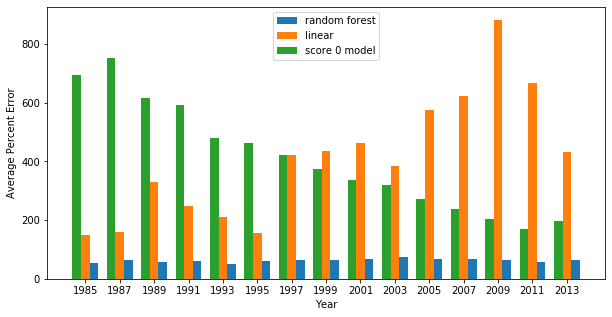

In [41]:
avgs = []
avgs0 = []
avgs_linear = []
for year in years:
    series = result.loc[result['YEAR'] == year, 'PERCENT_ERROR']
    avg = series.apply(abs).mean()
    avgs.append(avg)
    
    series = result.loc[result['YEAR'] == year, 'PERCENT_ERROR_0']
    avg = series.apply(abs).mean()
    avgs0.append(avg)
    
    series = result_0.loc[result_0['YEAR'] == year, 'PERCENT_ERROR']
    avg = series.apply(abs).mean()
    avgs_linear.append(avg) 
    
fig, ax = plt.subplots(figsize=(10,5))

width = 0.5
offset = 0.5

x = [year + offset for year in years]
bar1 = ax.bar(x, avgs, width, label = 'random forest')

x = [year for year in years]
bar2 = ax.bar(x, avgs_linear, width, label = 'linear')

x = [year - offset for year in years]
bar3 = ax.bar(x, avgs0, width, label = 'score 0 model')

ax.set_xticks(years)
ax.set_xticklabels(years)

ax.set_ylabel('Average Percent Error')
ax.set_xlabel('Year')

ax.legend()

plt.show()


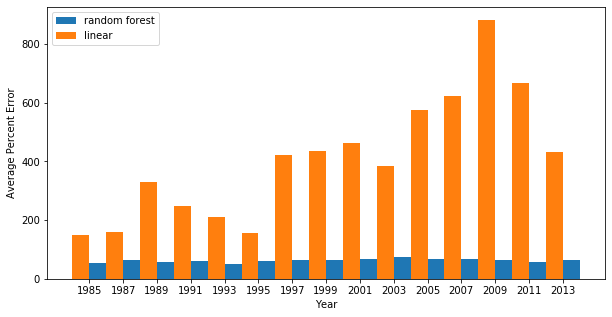

In [42]:
fig, ax = plt.subplots(figsize=(10,5))

offset = 0.5
width = 1

x = [year + offset for year in years]
bar1 = ax.bar(x, avgs, width, label = 'random forest')

x = [year - offset for year in years]
bar2 = ax.bar(x, avgs_linear, width, label = 'linear')

ax.set_xticks(years)
ax.set_xticklabels(years)

ax.set_ylabel('Average Percent Error')
ax.set_xlabel('Year')

ax.legend()

plt.show()


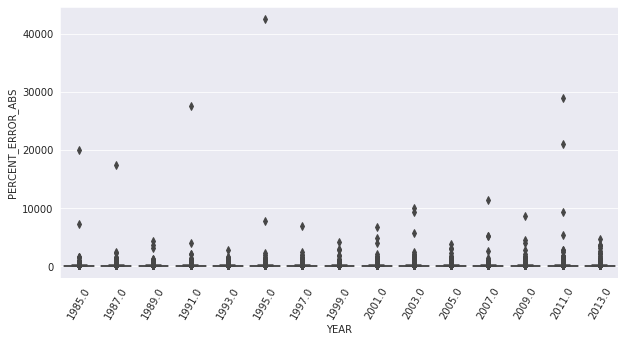

In [44]:
import seaborn as sns
series = result.loc[:,'PERCENT_ERROR'].apply(abs)
result['PERCENT_ERROR_ABS'] = series
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.xticks(years, years, rotation=60)
sns.boxplot(x='YEAR', y='PERCENT_ERROR_ABS', data=result)
plt.show()

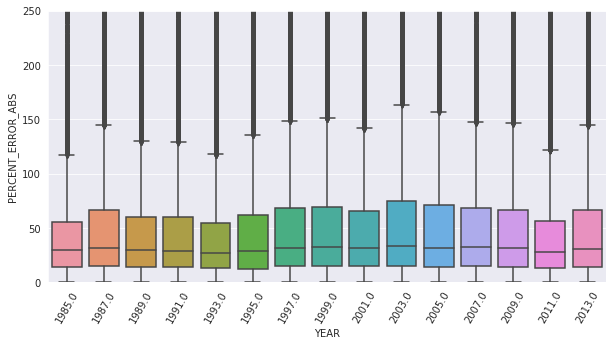

In [46]:
plt.figure(figsize=(10,5))
plt.ylim(0, 250)
plt.xticks(years, years, rotation=60)
sns.boxplot(x='YEAR', y='PERCENT_ERROR_ABS', data=result)
plt.show()